# Demos for analyzing World Color Survey (WCS)

COG 260: Data, Computation, and The Mind (Yang Xu)

Data source: http://www1.icsi.berkeley.edu/wcs/data.html

______________________________________________

Import helper function file for WCS data analysis.

In [1]:
from wcs_helper_functions import *

Import relevant Python libraries.

In [234]:
import numpy as np
import pandas as pd
from scipy import stats
from random import random
import seaborn as sns

%matplotlib inline

## Demo 3: Import color naming data
    
> Each of the 330 color chips was named by speakers of 110 different languages.

______________________________________________

Load naming data. 

`namingData` is a hierarchical dictionary organized as follows:

**language _(1 - 110)_ &rarr; speaker _(1 - *range varies per language*)_ &rarr; chip index _(1 - 330)_ &rarr; color term**

In [121]:
namingData = readNamingData('term.txt')

For example, to obtain naming data from language 1 and speaker 1 for all 330 color chips:

## Demo 5: Import speaker demographic information

> Most speakers' age _(integer)_ and gender _(M/F)_ information was recorded.

______________________________________________

Load speaker information.

`speakerInfo` is a hierarchical dictionary organized as follows:

**language &rarr; speaker &rarr; (age, gender)**

In [6]:
speakerInfo = readSpeakerData('spkr-lsas.txt')

### Data Manipulation

In [26]:
speaker_num_naming_data = []

for val in namingData: 
    speaker_num_naming_data.append(len(list(namingData[val].keys())))

In [31]:
len(speaker_num_naming_data)

110

In [58]:
speaker_num_gender_data = []

for val in speakerInfo:
    speaker_num_gender_data.append(len(list(speakerInfo[val].keys())))

In [60]:
len(speaker_num_gender_data)

110

In [62]:
[print(n,g) for n,g in zip(speaker_num_naming_data,speaker_num_gender_data) if n !=g]

24 25
24 25
6 8
26 25
25 24


[None, None, None, None, None]

In [63]:
indices = [n for n in range(len(speaker_num_naming_data)) if speaker_num_naming_data[n] !=speaker[n] ]
indices

[61, 87, 92, 94, 96]

### Data Cleaning

In [113]:
cleaned_speaker_num_naming_data = []
cleaned_naming_data = []

for val in namingData: 
    if val not in indices: 
        cleaned_speaker_num_naming_data.append(len(list(namingData[val].keys())))

In [122]:
len(cleaned_speaker_num_naming_data)
len(namingData)

110

In [138]:
myDict1 = {key:val for key, val in namingData.items() if key != 61}
myDict2 = {key:val for key, val in myDict1.items() if key != 87}
myDict3 = {key:val for key, val in myDict2.items() if key != 92}
myDict4 = {key:val for key, val in myDict3.items() if key != 94}
cleaned_naming_data = {key:val for key, val in myDict4.items() if key != 96}

In [139]:
len(cleaned_naming_data)

105

In [140]:
unique_colour_list = [] #contains the number of unique colours named by each speaker

for val in cleaned_naming_data: 
    for s in cleaned_naming_data[val]:
        unique_colour_list.append(len(list(set(list(cleaned_naming_data[val][s].values())))))

In [141]:
len(unique_colour_list)

2517

In [142]:
Dict1 = {key:val for key, val in speakerInfo.items() if key != 61}
Dict2 = {key:val for key, val in Dict1.items() if key != 87}
Dict3 = {key:val for key, val in Dict2.items() if key != 92}
Dict4 = {key:val for key, val in Dict3.items() if key != 94}
cleaned_gender_data = {key:val for key, val in Dict4.items() if key != 96}

In [143]:
len(cleaned_gender_data)

105

### Creating the Dataframe 

In [181]:
gender_age = []
gender = []
age = []


speaker = [] # list of total number of speakers in each language 

for val in cleaned_gender_data:
    #print(val)
    speaker.append(len(list(cleaned_gender_data[val].keys())))
    for s in cleaned_gender_data[val]:
        gender_age.append((cleaned_gender_data[val][s][0][1],cleaned_gender_data[val][s][0][0]))
        gender.append(cleaned_gender_data[val][s][0][1])
        age.append(int(cleaned_gender_data[val][s][0][0]))
        

In [184]:
s = np.arange(1,111)
s= [str(i) for i in s] 
speaker_col = []
#print(s)

nested = [list(v*(s[i],)) for v, i in zip(speaker, range(len(s)))]
#nested

In [211]:
language = [ int(item) for elem in nested for item in elem] 

In [212]:
len(language)

2519

In [213]:
full_df = pd.DataFrame(list(zip(language, gender, age, gender_age, unique_colour_list)), columns = ['language', 'gender', 'age', 'gender_age','unique' ])

In [214]:
clean = full_df[full_df.gender != '*']
clean = clean[clean.gender != 'X']
clean.gender[clean.gender == 'f'] = "F"
    
clean['gender'].describe()

count     2512
unique       2
top          M
freq      1294
Name: gender, dtype: object

In [189]:
clean.head(5)

,language,gender,age,gender_age,unique
0,1,M,90,"(M, 90)",6
1,1,M,26,"(M, 26)",7
2,1,M,38,"(M, 38)",6
3,1,M,35,"(M, 35)",6
4,1,M,80,"(M, 80)",7


In [266]:
clean[clean['language']==9]

,language,gender,age,gender_age,unique
192,9,F,0,"(F, 0)",8
193,9,F,0,"(F, 0)",8
194,9,F,0,"(F, 0)",5
195,9,F,0,"(F, 0)",9
196,9,F,0,"(F, 0)",9
197,9,F,0,"(F, 0)",7
198,9,F,0,"(F, 0)",6
199,9,F,0,"(F, 0)",6
200,9,F,0,"(F, 0)",6
201,9,F,0,"(F, 0)",6


In [215]:
clean.dtypes

language       int64
gender        object
age            int64
gender_age    object
unique         int64
dtype: object

In [191]:
clean[['unique', 'age']].describe()

,unique,age
count,2512.000000,2512.000000
mean,8.465764,35.563296
std,3.624173,16.429131
min,2.000000,0.000000
25%,6.000000,23.000000
50%,8.000000,33.000000
75%,10.000000,46.000000
max,40.000000,91.000000


### Data Visualization

#### The Gender Count Difference across 105 Languages 

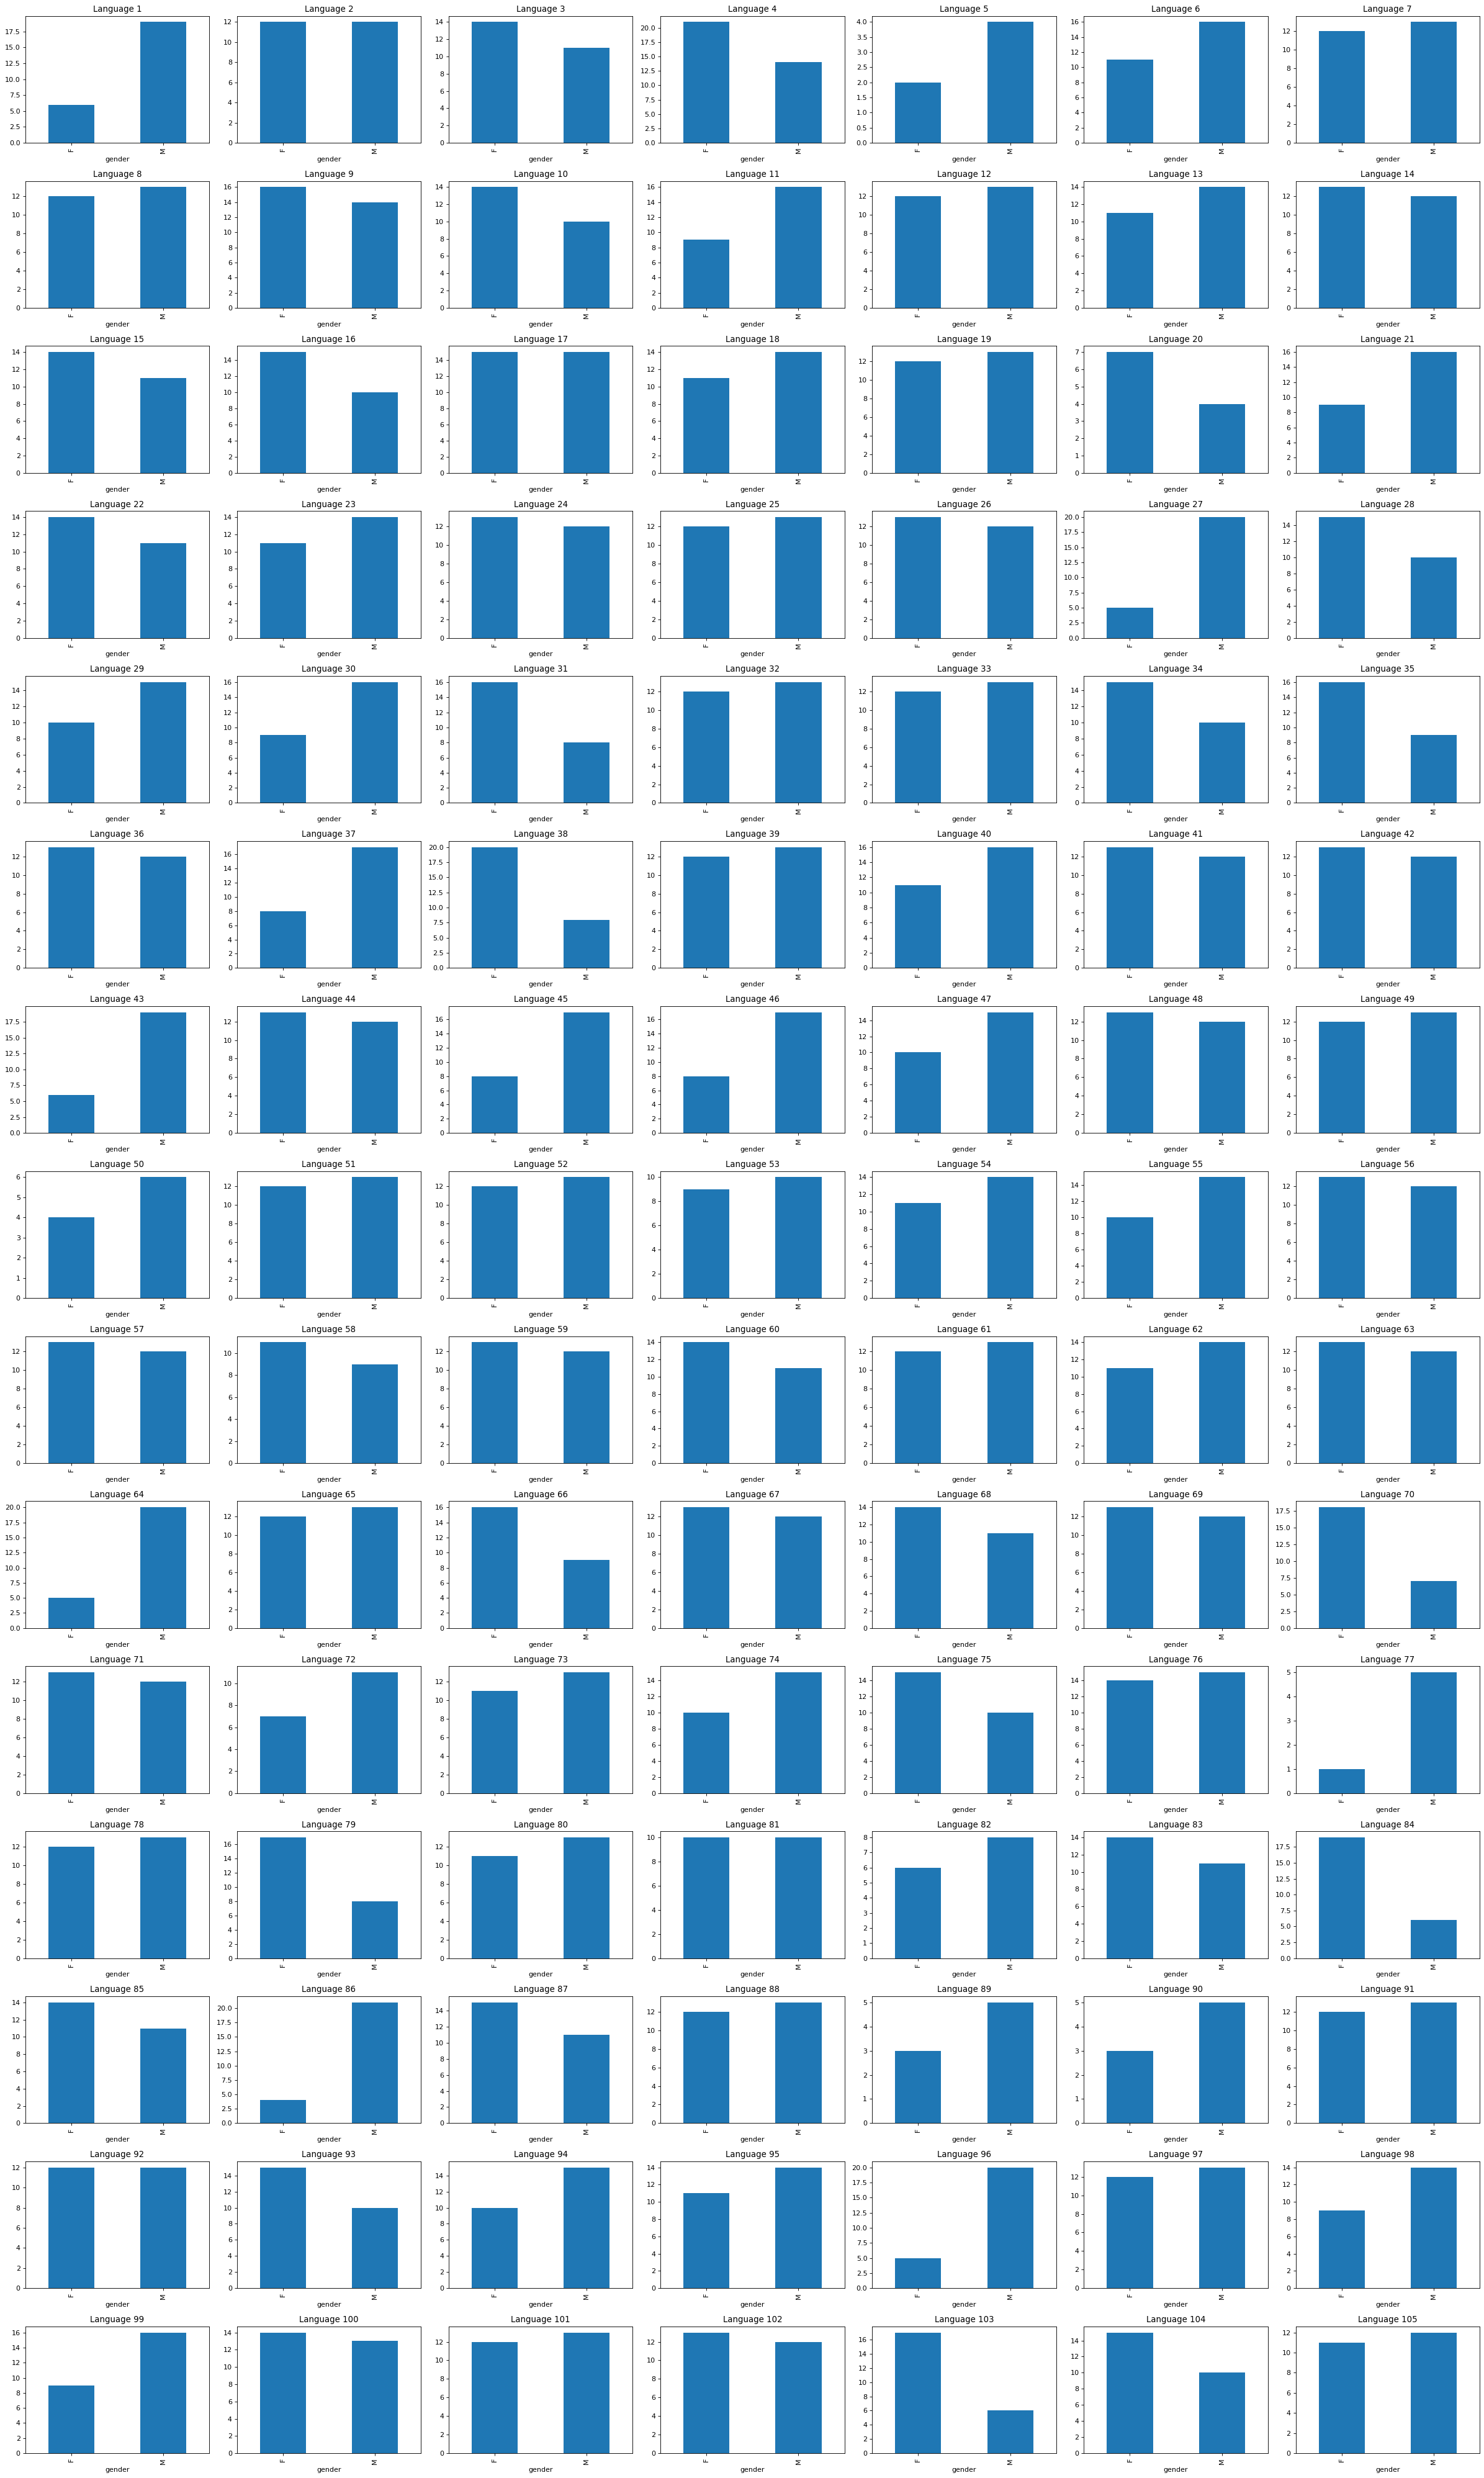

In [260]:
# find how the number of each gender varies across the languages  

fig = plt.figure(figsize=(30, 50), dpi= 80, facecolor='w', edgecolor='k')

# Loop over the languages
for s in range(1,106):    
    lang = clean[clean['language']==s]
    plt.subplot(15,7,s);
    plt.title('s'+str(s));
    lang.groupby('gender').size().plot(kind='bar')
    plt.tight_layout()
    # Specify title of the plot by language index
    plt.title('Language '+str(s));
    


#### Regression Analysis : Age vs Unique Colour Names across 105 languages 

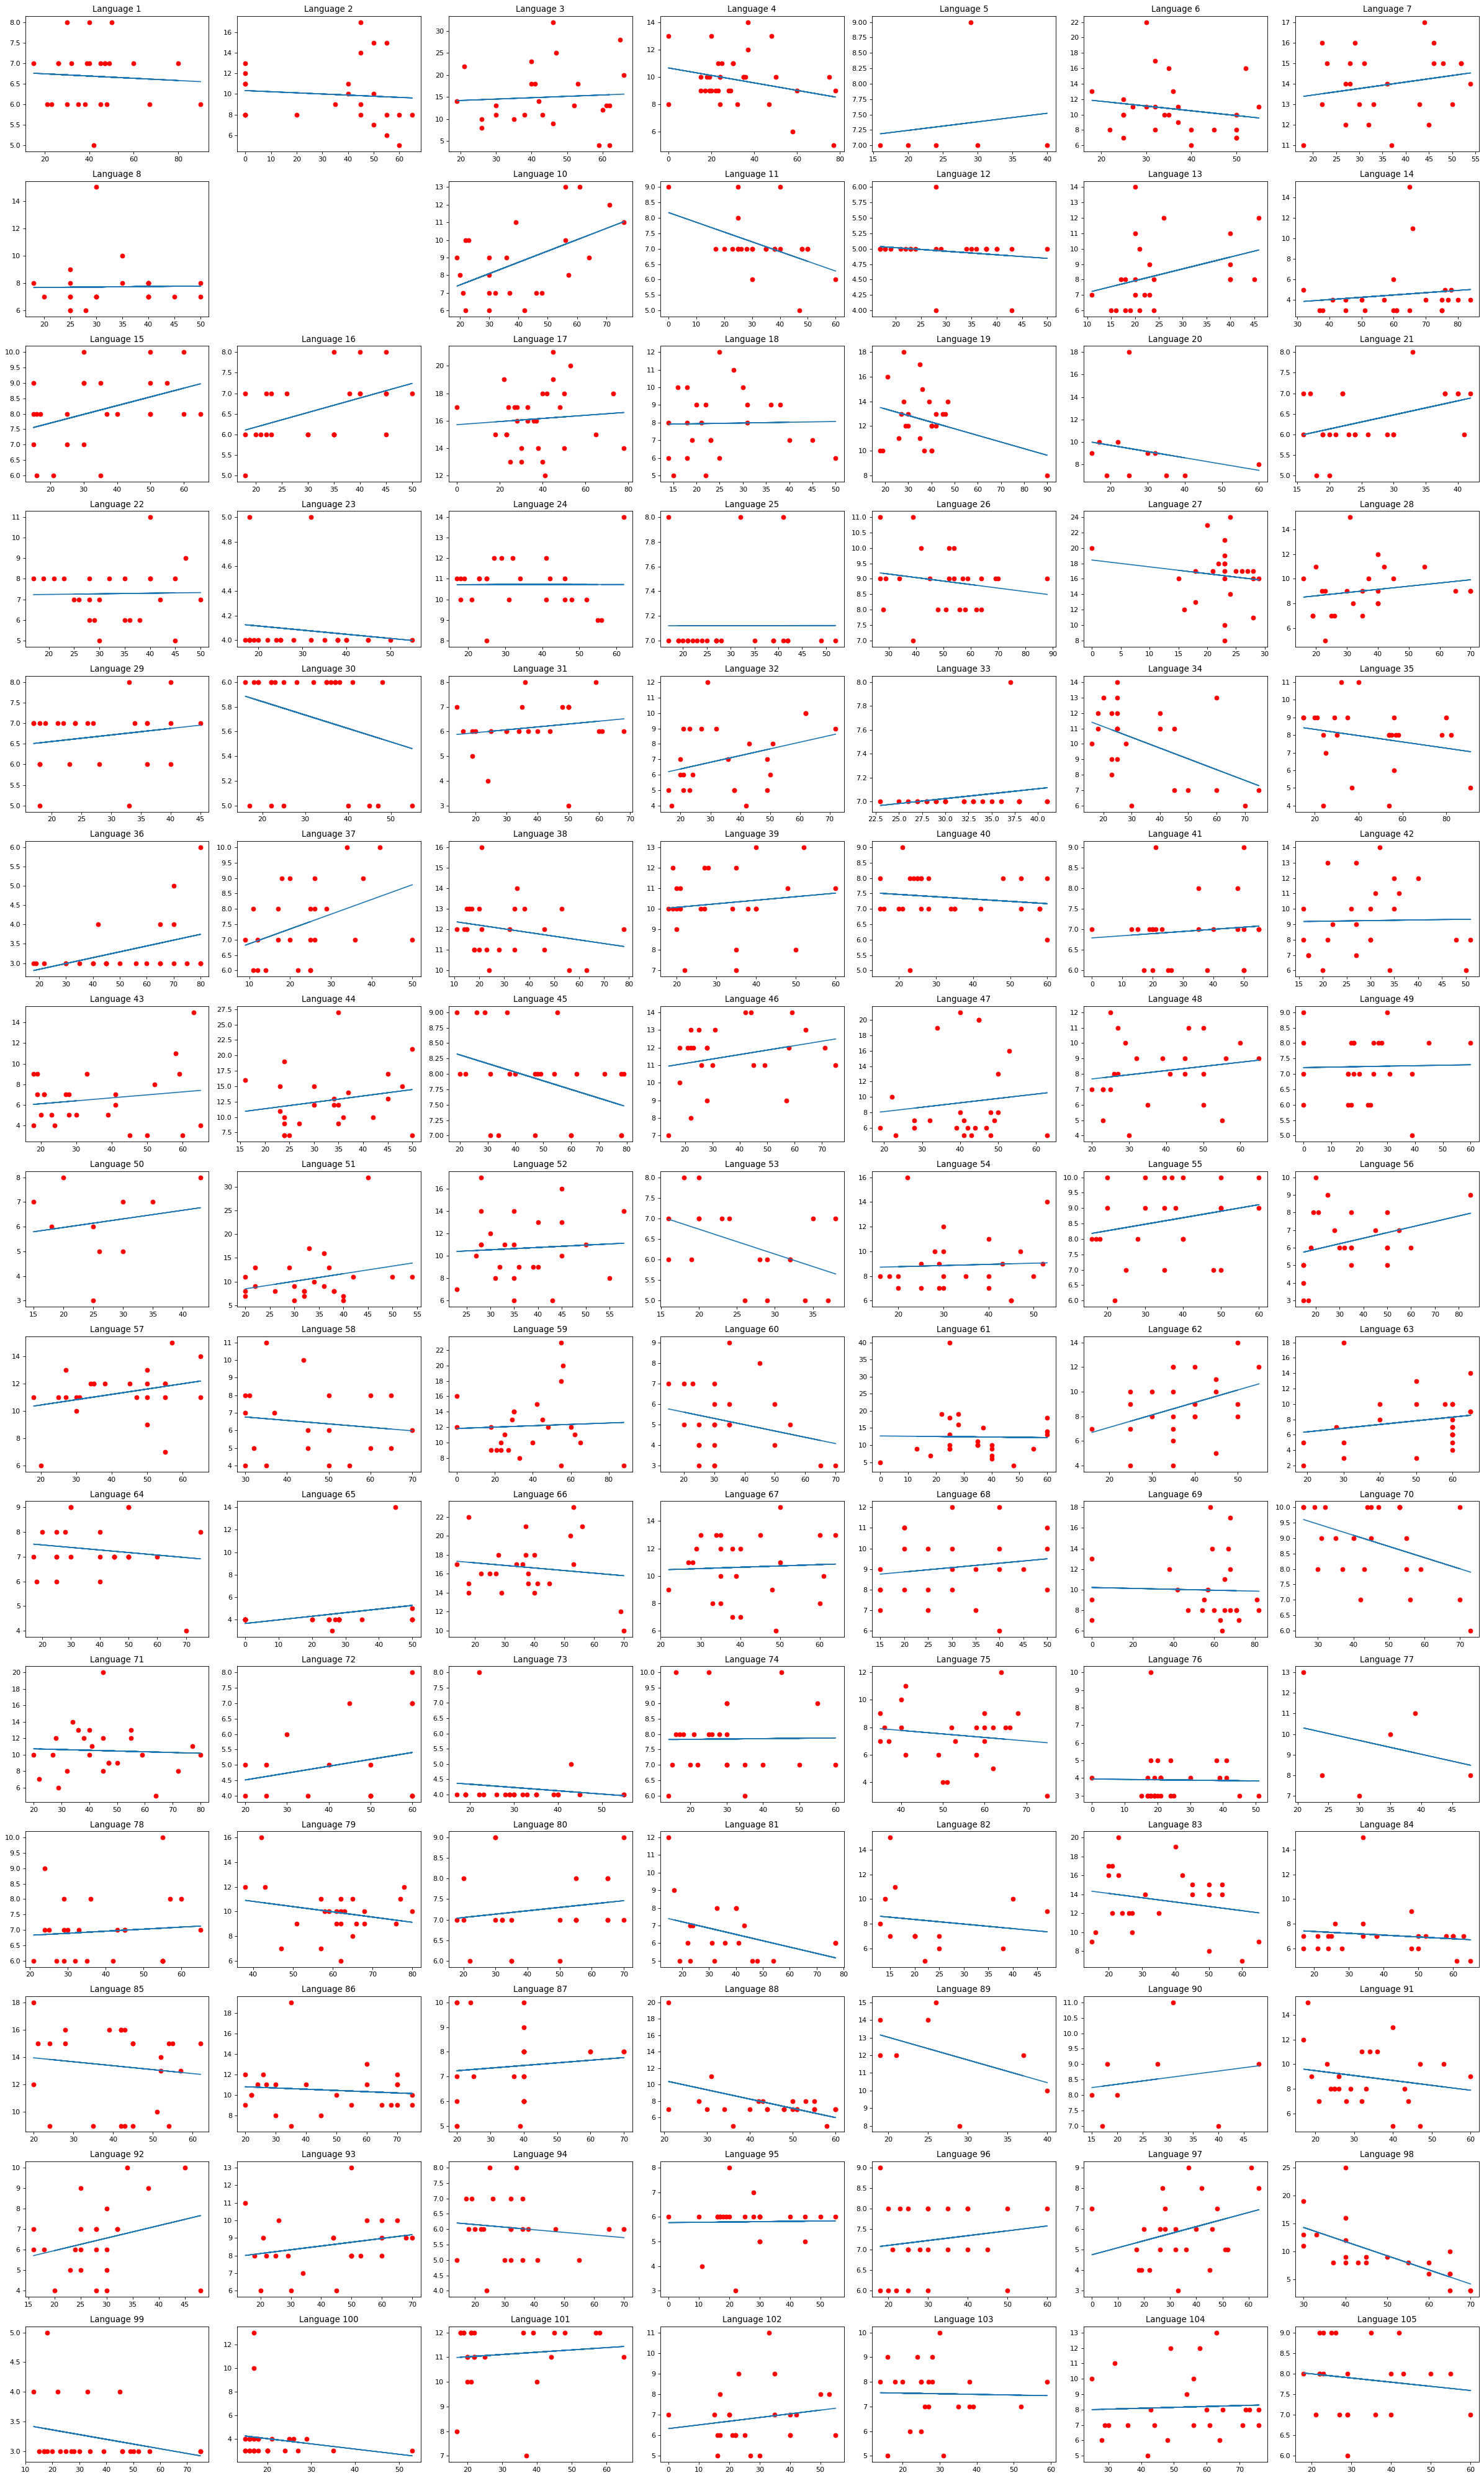

In [270]:
#create subplot for each language and identify the trends with linear regression lines across 110 languages
fig = plt.figure(figsize=(30, 50), dpi= 80, facecolor='w', edgecolor='k')

# Loop over the languages
for s in range(1,106): 
    if s !=9: 
        lang = clean[clean['language']==s]
        lang.dropna(inplace=True)

        #age vs unique across the langauges , gender as a the filler , get language based age and unique from the cleaned data 
        x = lang.age
        y = lang.unique

        m, b = np.polyfit(x, y, 1) # m = slope, b=intercept.

        # Create a subplot for this language
        plt.subplot(15,7,s);
        plt.title('s'+str(s));

        # Scatter plot age vs unique with gender as a marker

        plt.plot(x, y, 'ro')
                 #, marker = "." ,markersize = 1);

        # Juxtapose the fitted line onto this scatter plot
        plt.plot(x, m*x + b) 
        plt.tight_layout()

        # Specify title of the plot by language index
        plt.title('Language '+str(s));
        
        #9 is removed as the age value for it is 0 for all entries 


In [18]:
# TODO: gender vs number of unique colour names

### Test Statistics 